In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def c0(N, h):
    c0 = np.array(0)
    j = np.arange(1, N + 1)
    c0 = np.append(c0, 2 - (2 * np.exp(j * h) + 2 * np.exp(1 - j * h)) / (1 + np.exp(1)))
    c0 = np.append(c0, 0)
    return c0

In [5]:
def hgrad(ck, N, h):
    gr = np.array(0)
    j = np.arange(1, N + 1)
    gr = np.append(gr, 2 * ck[j] - ck[j - 1] - ck[j + 1] + np.power(h, 2) * (2 * ck[j] / 3 + ck[j - 1] / 6 + ck[j + 1] / 6) + np.power(h, 2) * np.power(ck[j], 3) * np.sin(j * h) - 2 * np.power(h, 2))
    gr = np.append(gr, 0)
    return gr

In [6]:
def function(c, N, h):
    s1 = 0
    for j in range(1, N + 1):
        s1 += c[j] ** 2 - c[j] * c[j - 1] - c[j] * c[j + 1]
    s2 = 0
    for j in range(1, N + 1):
        s2 += c[j] ** 2 / 3 + c[j] * c[j - 1] / 6 + c[j] * c [j + 1] / 6
    s3 = 0
    for j in range(1, N + 1):
        s3 += c[j] ** 4 * np.sin(j * h)
    s4 = 0
    for j in range(1, N + 1):
        s4 += c[j]
    return s1 / h + h * s2 + h * s3 / 4 - 2 * h * s4

In [7]:
def gradient_descent(N, h, eps):
    w = 1
    ck = c0(N, h)
    ck1 = ck - w * hgrad(ck, N, h)
    number_of_approximations = 2
    count = 0
    while function(ck1, N, h) >= function(ck, N, h) and abs(
            abs(function(ck, N, h)) - abs(function(ck1, N, h))) >= eps:
        count += 1
        w = w / 2
        ck1 = ck - w * hgrad(ck, N, h)
    while abs(abs(function(ck, N, h)) - abs(function(ck1, N, h))) >= eps:
        number_of_approximations += 1
        w = 1
        ck = ck1
        ck1 = ck - w * hgrad(ck, N, h)
        while function(ck1, N, h) >= function(ck, N, h) and abs(
                abs(function(ck, N, h)) - abs(function(ck1, N, h))) >= eps:
            count += 1
            w = w / 2
            ck1 = ck - w * hgrad(ck, N, h)
    print(f'Для N = {N}:')
    print(f'epsilon = {eps}')
    print('Кол-во понадобившихся приближений =', number_of_approximations)
    print('Коэффциент релаксации на последнем приближении =', w)
    print('Количество раз понижения коэффициента за всю программу:', count)
    print()
    return ck1

Для N = 9:
epsilon = 1e-11
Кол-во понадобившихся приближений = 2
Коэффциент релаксации на последнем приближении = 1.4901161193847656e-08
Количество раз понижения коэффициента за всю программу: 26



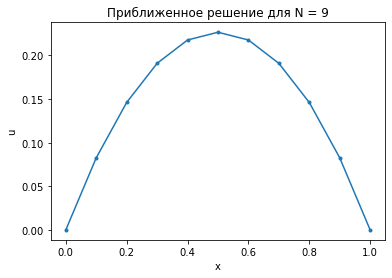

In [8]:
N = 9
x = np.linspace(0, 1, N + 2)  # N + 1 частей отрезка -> N + 2 точек разбиения
h = 1 / (N + 1)
epsilon = 1e-11
u = gradient_descent(N, h, epsilon)
plt.plot(x, u, marker='.')
plt.xlabel('x')
plt.ylabel('u')
plt.title(f'Приближенное решение для N = {N}')
plt.show()

Для N = 99:
epsilon = 1e-11
Кол-во понадобившихся приближений = 2
Коэффциент релаксации на последнем приближении = 7.450580596923828e-09
Количество раз понижения коэффициента за всю программу: 27



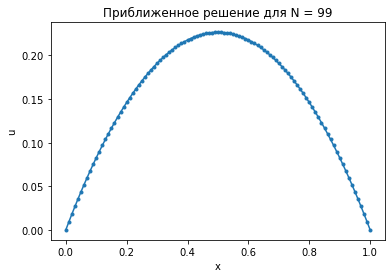

In [9]:
N = 99
x = np.linspace(0, 1, N + 2)  # N + 1 частей отрезка -> N + 2 точек разбиения
h = 1 / (N + 1)
u = gradient_descent(N, h, epsilon)
plt.plot(x, u, marker='.')
plt.xlabel('x')
plt.ylabel('u')
plt.title(f'Приближенное решение для N = {N}')
plt.show()